# Editted Template for plots
I have editted the program a bit to redo the printing of the best fit line, to hopefully make it a bit easier to understand.

I have also added the determination of the $R^2$ since you will need this for your lab reports
___

In [1]:
# Import the needed libraries
import matplotlib.pyplot as plt  # For creating plots
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib as mpl  # For additional plotting functionality
from sklearn.metrics import r2_score # For calculating R^2 score

# Loads the data into a Pandas dataframe 'df' from an Excel file
df = pd.read_excel("./Thermocouple_Data_Exersise2.xlsx", sheet_name=1, header=0)

df

,Sample,Delta T,mean,std,95% conf
0,emf IW/N2 (mV),-196,-5.436909,0.032024,0.021514
1,emf IW/CO2 (mV),-78,-2.391455,0.147575,0.099142
2,emf IW/IW (mV),0,0.009545,0.015162,0.010186
3,emf BW/IW (mV),100,4.116818,0.038454,0.025834


In [ ]:
def plot_linear(xaxis, yaxis, fmt="ko-", label="data"):
    # Plots the data with error bars
    ax.plot(xaxis, yaxis,
                fmt,  # Format of the data points
                label = label)  # Label for the data points
    
def plot_errorbar(xaxis, yaxis, error, fmt="o", color="k", label="data"):
    # Plots the data with error bars
    ax.errorbar(xaxis, yaxis,
                yerr = error,  # Error bars represent 95% confidence interval
                fmt = fmt,  # Format of the data points
                capsize=8,  # Size of the caps on error bars
                color = color,  # Color of the data points and error bars
                label = label)  # Label for the data points
    
def plot_linear_fit(xaxis, yaxis, color="r-", label="1st order Fit"):
    z, cov = np.polyfit(xaxis, yaxis, 1, cov=True)  # Perform linear fit and get covariance matrix
    p = np.poly1d(z)
    r2_p = r2_score(yaxis, p(xaxis))
    
    # Calculate errors in slope and intercept
    slope_error = np.sqrt(cov[0, 0])
    intercept_error = np.sqrt(cov[1, 1])
    
    print("")
    print("Fit line: y={:.6f}x+{:.6f}, R^2 = {:.6f}".format(z[0], z[1], r2_p))
    print("Slope error: {:.6f}, Intercept error: {:.6f}".format(slope_error, intercept_error))
    
    ax.plot(xaxis, p(xaxis), color, label=label)  # Plot the linear fit

def plot_quad_fit(xaxis,yaxis, color="r-", label="2nd order Fit"):
    z, cov = np.polyfit(x_axis, y_axis, 2, cov=True)  # Perform quadratic fit and get covariance matrix`
    p = np.poly1d(z)
    r2_p = r2_score(y_axis,p(x_axis))

    # Calculate errors in slope and intercept
    slope_x_error = np.sqrt(cov[0, 0])
    slope_x2_error = np.sqrt(cov[1, 1])
    intercept_error = np.sqrt(cov[2, 2])

    print("")
    print("Fit line: y={:.6f}x^2+{:.6f}x+{:.6f}, R^2 = {:.6f}".format(z[0],z[1],z[2],r2_p))
    print("Slope (x^2) error: {:.6f}, Slope (x) error: {:.6f}, Intercept error: {:.6f}".format(slope_x2_error, slope_x_error, intercept_error))
    ax.plot(x_axis, p(x_axis), color, label=label)  # Linear fit



Fit line: y=0.032022x+0.467446, R^2 = 0.986098
Slope error: 0.002689, Intercept error: 0.313819

Fit line: y=0.000040x^2+0.035983x+0.093117, R^2 = 0.999713
Slope (x^2) error: 0.000793, Slope (x) error: 0.000006, Intercept error: 0.083773


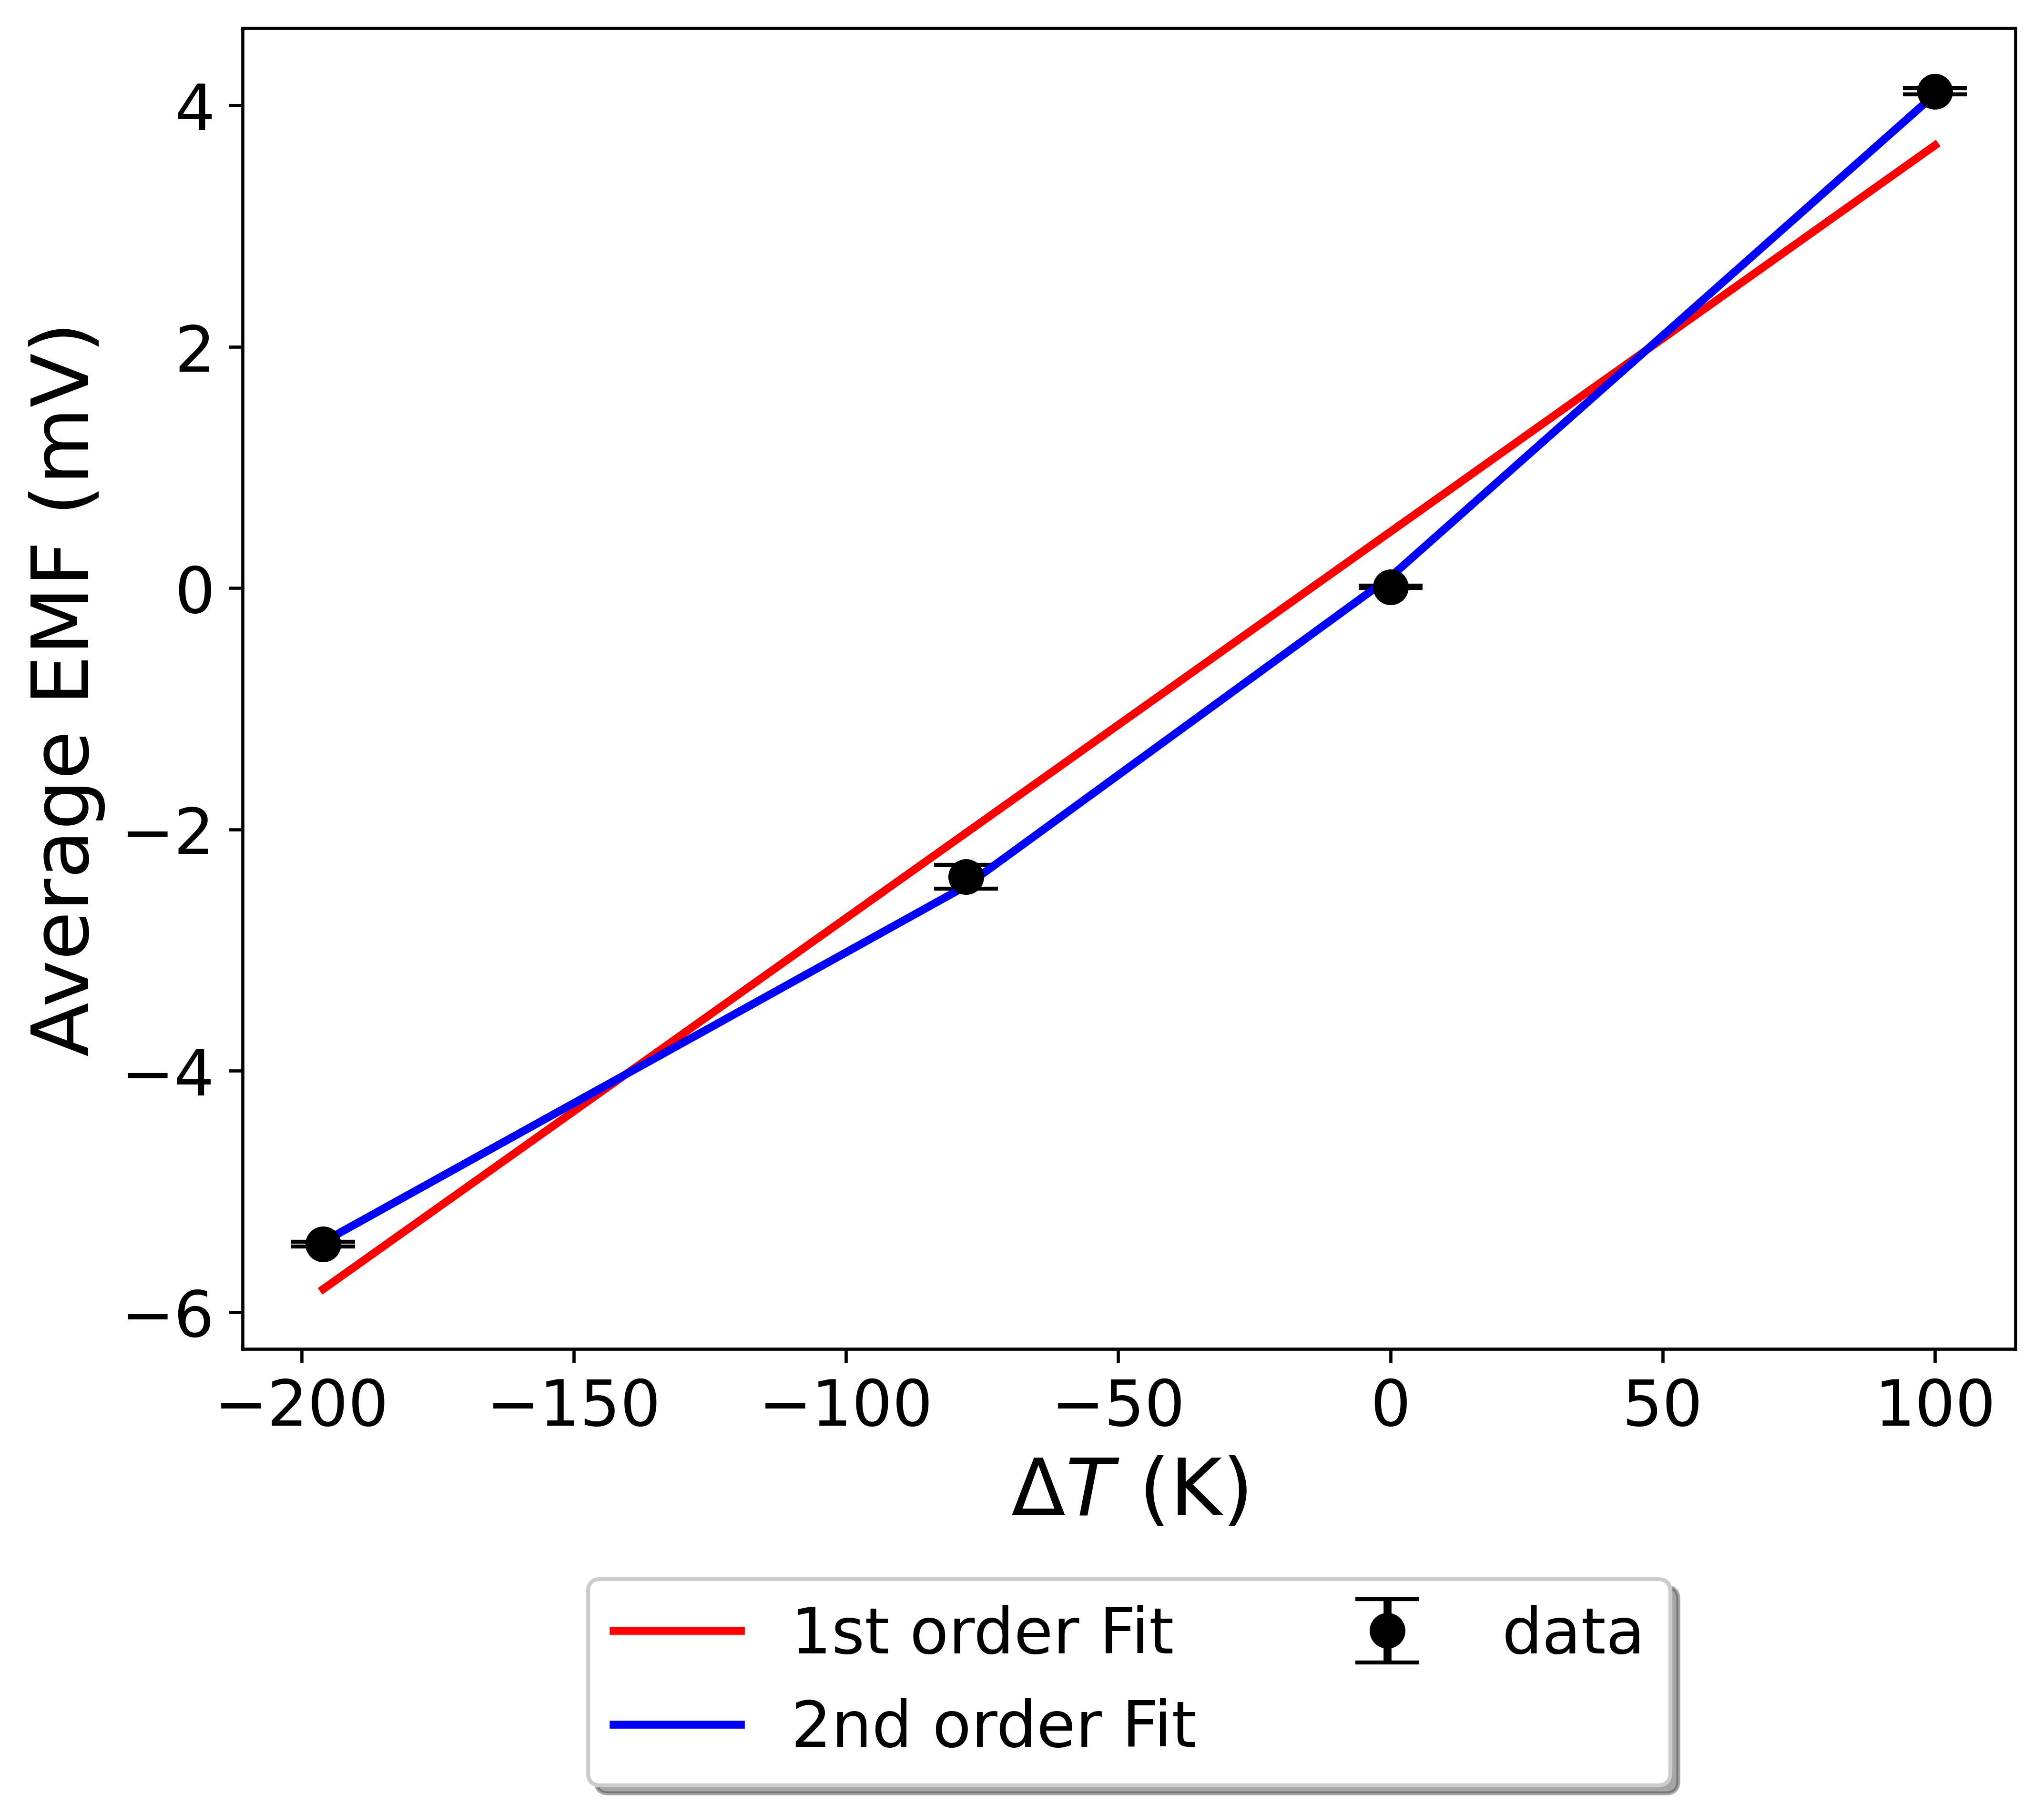

In [10]:
x_axis = df["Delta T"]
y_axis = df["mean"]

# Sets default parameters to be used for matplotlib
mpl.rcParams['font.size'] = 16  # Default font size
mpl.rcParams['axes.titlesize'] = 20  # Default title size
mpl.rcParams['lines.linewidth'] = 2  # Default line width
mpl.rcParams['lines.markersize'] = 8  # Default marker size

# Creates the blank plot
fig, ax = plt.subplots(figsize=(8,6), dpi = 600)

plot_errorbar(x_axis,y_axis,df['95% conf'])
#plot_linear(x_axis,y_axis)
plot_linear_fit(x_axis,y_axis)
plot_quad_fit(x_axis,y_axis, color='b-')

# Sets the axis labels
ax.set_xlabel(r'$\Delta T$ (K)', size=20)  # x-axis label
ax.set_ylabel('Average EMF (mV)', size=20)  # y-axis label

# Adds a legend to the plot
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Saves the plot to an image
plt.savefig("EMF_vs_T_2.png", dpi=600)

# Displays the plot
plt.show()